# <center> Benchmark Model and Logistic Regression </center>

Let's first try to train a simple logistic regression classifier and see how it compares to the benchmark model.

In [1]:
import numpy as np
from IPython.display import display
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import log_loss, accuracy_score
from capstone_project import utility

%matplotlib inline

/home/andre/software/anaconda3/envs/capstone_project/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Load train and validation data:

In [2]:
file_directory = "../output/data/"

train_data = utility.load_pickle(file_directory, "train_features.pkl")
val_data = utility.load_pickle(file_directory, "val_features.pkl")
train_labels = utility.load_pickle(file_directory, "train_labels.pkl")
val_labels = utility.load_pickle(file_directory, "val_labels.pkl")

Okay now we can have a look at the dataframe and check if we loaded the correct one:

In [3]:
display(train_data.head(2))

,q1_length,q2_length,diff_length,q1_n_words,q2_n_words,q1_len_word_ratio,q2_len_word_ratio,word_share,word2vec_cosine_distance,word2vec_cityblock_distance,word2vec_jaccard_distance,word2vec_canberra_distance,word2vec_minkowski_distance,word2vec_euclidean_distance,word2vec_braycurtis_distance,word2vec_skew_q1,word2vec_skew_q2,word2vec_kurtosis_q1,word2vec_kurtosis_q2
0,45.0,43.0,2.0,4.0,4.0,11.25,10.75,0.75,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,-0.062758,-0.062758,-0.018099,-0.018099
1,35.0,28.0,7.0,4.0,2.0,8.75,14.00,0.75,0.284728,10.443771,1.0,155.042762,0.340201,0.754624,0.410348,0.102440,0.076298,-0.197483,0.017166


We are going to use a pipeline to scale the features and train a logistic regression with its default values:

In [4]:
mms = MinMaxScaler()
clf = LogisticRegression()

pipe = Pipeline([("minmax_scaler", mms), ("logisitc_regression", clf)])


pipe.fit(train_data.values, train_labels)

Pipeline(steps=[('minmax_scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('logisitc_regression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

Save the model in case we need it later:

In [5]:
model_directory = "../output/models/"
prefix = "for_validation_"

utility.save_pickle(pipe, model_directory, prefix+"logistic_pipe.pkl") 

Create prediction on the validation data:

In [6]:
predictions_log = pipe.predict_proba(val_data)[:,1]

Calculate validation scores:

In [7]:
loss = log_loss(val_labels, predictions_log)
acc = accuracy_score(val_labels, np.rint(predictions_log))

print "Validation scores for the Logsitic regression\n LogLoss: {:.4f}\n Accuracy: {:.2f} ".format(loss, acc)

Validation scores for the Logsitic regression
 LogLoss: 0.5244
 Accuracy: 0.68 


and create receiver operation characteristic plot:

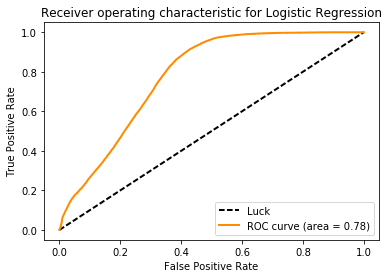

In [8]:
plt = utility.create_roc_plot(val_labels, predictions_log, "Logistic Regression")
plt.savefig("../output/figures/logistic_roc_plot.png")
plt.show()

Now let's calculate the benchmark model scores in order to be able to compare them to our logistic regression scores:

In [9]:
predictions = val_data["word_share"]

loss = log_loss(val_labels, predictions)
acc = accuracy_score(val_labels, np.rint(predictions))

print "Validation scores for the benchmark model\n LogLoss: {:.4f}\n Accuracy: {:.2f} ".format(loss, acc)

Validation scores for the benchmark model
 LogLoss: 0.7603
 Accuracy: 0.69 


and let's create a ROC plot for the benchmark model too:

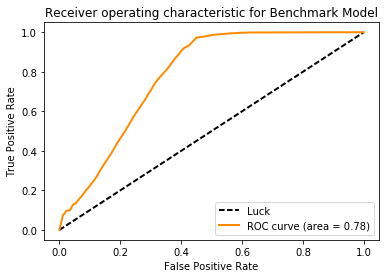

In [10]:
plt = utility.create_roc_plot(val_labels, predictions, "Benchmark Model")
plt.savefig("../output/figures/word_share_roc_plot.png")
plt.show()